# Data Exploring

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from tqdm import tqdm

In [2]:
df = pd.read_feather("../data/player_match_statistics.feather")
df

,Map,Region,Rounds,Winner,Premade,Score,Score First Half,Score Second Half,Score Overtime,Nickname,...,Deaths,Headshots,Headshot Ratio,K/D Ratio,K/R Ratio,Kills,MVPs,Ace,Quad Kills,Triple Kills
0,de_train,EU,25,True,False,16,8,8,0,GrandeS,...,14,9,0.53,1.21,0.68,17,4,0,0,1
1,de_train,EU,25,True,False,16,8,8,0,Babalicious-,...,18,16,0.62,1.44,1.04,26,2,0,1,2
2,de_train,EU,25,True,False,16,8,8,0,Celebrations,...,14,4,0.27,1.07,0.60,15,2,0,0,1
3,de_train,EU,25,True,False,16,8,8,0,gabex0,...,14,13,0.43,2.14,1.20,30,6,0,1,1
4,de_train,EU,25,True,False,16,8,8,0,Ekuuu,...,18,8,0.36,1.22,0.88,22,2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80411,de_overpass,US,25,False,False,9,5,4,0,Rickeh,...,20,7,0.29,1.20,0.96,24,3,0,0,1
80412,de_overpass,US,25,False,False,9,5,4,0,dapr,...,18,9,0.60,0.83,0.60,15,3,1,0,0
80413,de_overpass,US,25,False,False,9,5,4,0,crashies,...,20,7,0.54,0.65,0.52,13,2,0,0,0
80414,de_overpass,US,25,False,False,9,5,4,0,frkzd,...,22,3,0.60,0.23,0.20,5,0,0,0,0


## Eigenschaften des Datensatzes

In [6]:
df.describe()

,Rounds,Score,Score First Half,Score Second Half,Score Overtime,Assists,Deaths,Headshots,Headshot Ratio,K/D Ratio,K/R Ratio,Kills,MVPs,Ace,Quad Kills,Triple Kills
count,80416.000000,80416.00000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000,80416.000000
mean,26.635433,13.32700,7.502388,5.432227,0.392385,3.416882,18.714758,8.867651,0.477784,1.081807,0.700665,18.673809,2.668984,0.023441,0.206016,1.026089
std,5.235746,4.41636,2.848374,2.809783,1.448636,2.072360,4.866905,4.240026,0.160136,0.635158,0.225990,6.849107,1.809258,0.154632,0.467137,1.079638
min,9.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,-0.110000,-0.120000,-2.000000,0.000000,0.000000,0.000000,0.000000
25%,23.000000,10.00000,6.000000,3.000000,0.000000,2.000000,16.000000,6.000000,0.370000,0.730000,0.550000,14.000000,1.000000,0.000000,0.000000,0.000000
50%,26.000000,16.00000,8.000000,6.000000,0.000000,3.000000,19.000000,8.000000,0.480000,1.000000,0.690000,18.000000,2.000000,0.000000,0.000000,1.000000
75%,29.000000,16.00000,9.000000,7.000000,0.000000,5.000000,21.000000,11.000000,0.580000,1.290000,0.840000,23.000000,4.000000,0.000000,0.000000,2.000000
max,66.000000,34.00000,15.000000,14.000000,19.000000,19.000000,56.000000,40.000000,7.000000,22.000000,2.140000,67.000000,15.000000,2.000000,5.000000,10.000000


In [7]:
df.corr()

,Rounds,Winner,Premade,Score,Score First Half,Score Second Half,Score Overtime,Professional,Assists,Deaths,Headshots,Headshot Ratio,K/D Ratio,K/R Ratio,Kills,MVPs,Ace,Quad Kills,Triple Kills
Rounds,1.000000,-0.001331,-0.085877,0.590693,0.002031,0.560917,0.708854,-0.003214,0.320693,0.771317,0.368369,-0.067227,-0.126838,0.009844,0.544566,0.289446,0.029048,0.081944,0.186212
Winner,-0.001331,1.000000,0.000609,0.701001,0.594874,0.446647,0.101110,0.052413,0.157446,-0.379522,0.184664,-0.045291,0.416187,0.352443,0.269863,0.341846,0.029351,0.084482,0.161940
Premade,-0.085877,0.000609,1.000000,-0.050305,0.001098,-0.068364,-0.022923,0.096864,-0.057865,-0.154046,-0.095589,-0.007854,0.043959,-0.075120,-0.110263,-0.025611,-0.010592,-0.029163,-0.055461
Score,0.590693,0.701001,-0.050305,1.000000,0.635790,0.692832,0.454692,0.051805,0.335883,0.102335,0.390886,-0.088627,0.362977,0.359761,0.574343,0.488457,0.044096,0.127412,0.261008
Score First Half,0.002031,0.594874,0.001098,0.635790,1.000000,-0.013950,-0.000896,0.060202,0.142899,-0.346437,0.168530,-0.059704,0.464240,0.363393,0.250130,0.309765,0.024648,0.074926,0.147776
Score Second Half,0.560917,0.446647,-0.068364,0.692832,-0.013950,1.000000,0.200015,0.020311,0.264425,0.238234,0.309476,-0.055016,0.108822,0.188520,0.442569,0.338933,0.034009,0.091837,0.186778
Score Overtime,0.708854,0.101110,-0.022923,0.454692,-0.000896,0.200015,1.000000,0.000167,0.230131,0.531083,0.260035,-0.046088,-0.017298,0.016605,0.400737,0.222656,0.020005,0.062982,0.142879
Professional,-0.003214,0.052413,0.096864,0.051805,0.060202,0.020311,0.000167,1.000000,0.035146,-0.056286,0.078180,0.019483,0.097237,0.106022,0.085275,0.084478,0.027537,0.051896,0.062743
Assists,0.320693,0.157446,-0.057865,0.335883,0.142899,0.264425,0.230131,0.035146,1.000000,0.248459,0.139709,-0.029321,-0.004721,0.048871,0.200457,0.152910,0.007613,0.031131,0.073423
Deaths,0.771317,-0.379522,-0.154046,0.102335,-0.346437,0.238234,0.531083,-0.056286,0.248459,1.000000,0.161937,0.012416,-0.509144,-0.265125,0.210814,-0.026988,-0.008383,-0.016001,0.009084


Die Korrelation des Datensatzes zeigt keine eindeutige Korrelation zwischen professionellen und normalen Spieler zu irgendeinem Attribut auf. Schaut man sich die Korrelation zwischen dem `Professional` und dem `Kills` Feature an zeigt sich, dass professionelle Spieler scheinbar mehr Kills machen als normale. Ein Blick auf die Korrelation zum `Deaths` Feature zeigt weiterhin, dass professionelle Spieler auch ein bisschen weniger getötet werden als normale. Dies wird vorallem bei der Korrelation zum `K/D Ratio` (Kills / Deaths Verhältnis) sichtbar: dort zeigt sich eine größere Korrelation. Ebenso bei der `K/R Ration`, als Kills pro Runde zeigt sich eine deutlich positive Korrelation.

In [73]:
df.dtypes

Map                   object
Region                object
Rounds                 int64
Winner                  bool
Premade                 bool
Score                  int64
Score First Half       int64
Score Second Half      int64
Score Overtime         int64
Nickname              object
Player ID             object
Professional            bool
Assists                int64
Deaths                 int64
Headshots              int64
Headshot Ratio       float64
K/D Ratio            float64
K/R Ratio            float64
Kills                  int64
MVPs                   int64
Ace                    int64
Quad Kills             int64
Triple Kills           int64
dtype: object

In [76]:
df.isna().sum()

Map                  0
Region               0
Rounds               0
Winner               0
Premade              0
Score                0
Score First Half     0
Score Second Half    0
Score Overtime       0
Nickname             0
Player ID            0
Professional         0
Assists              0
Deaths               0
Headshots            0
Headshot Ratio       0
K/D Ratio            0
K/R Ratio            0
Kills                0
MVPs                 0
Ace                  0
Quad Kills           0
Triple Kills         0
dtype: int64

Min negativ headshot-ratio, k/d etc. -> weil teamkills -> Soll mit einberechnet werden -> KEIN invalid value

## Violin plots

In [53]:
numeric_cols = df.select_dtypes(include='number').columns.tolist()
df_long_by_professional = df[numeric_cols + ['Professional']].melt(id_vars=['Professional'])

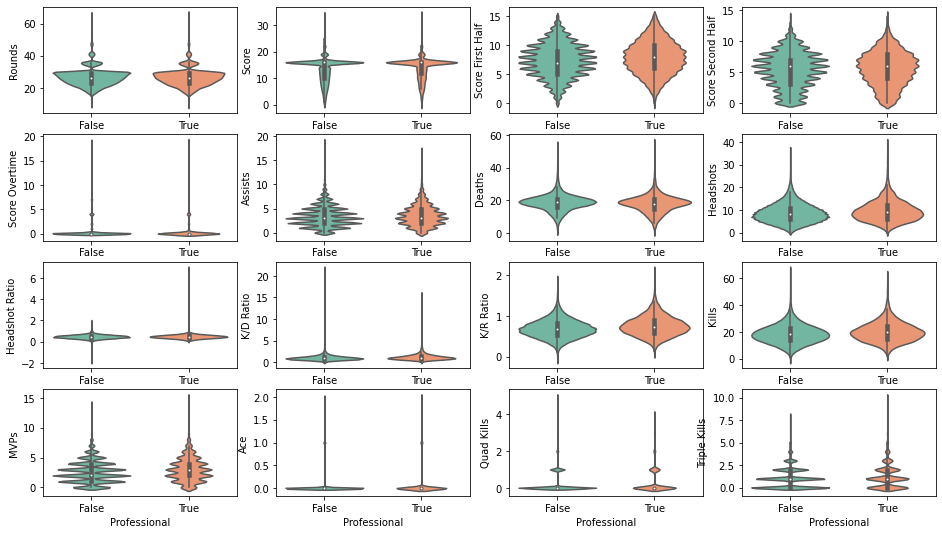

In [11]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(16, 9))
for i, column in enumerate(df.select_dtypes(include='number').columns):
    #print(i, i//rows, i%rows)
    #df_column = df_long_by_professional[df_long_by_professional["variable"] == column]
    ax = axs[i//rows, i%rows]
    sns.violinplot(y=column, x="Professional", data=df, palette="Set2", ax=ax)

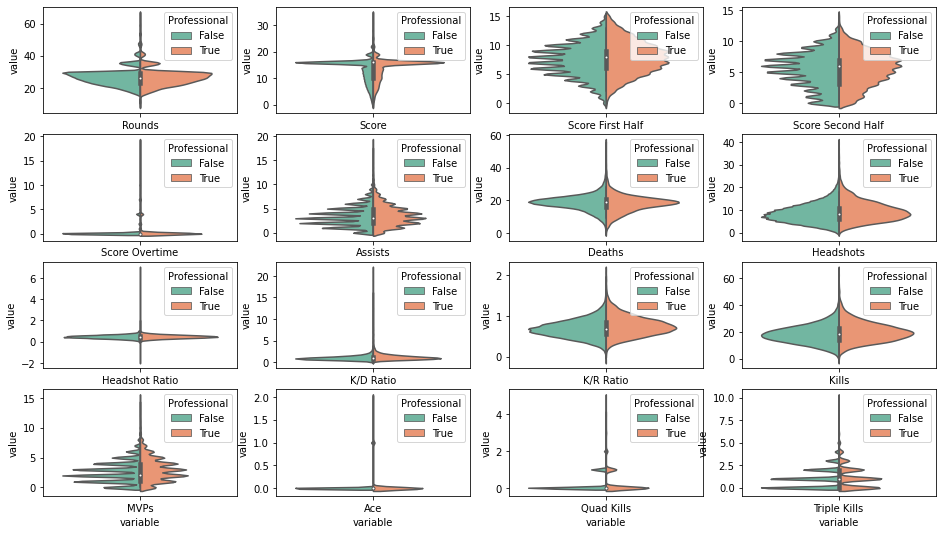

In [66]:
rows = 4
cols = 4
fig, axs = plt.subplots(4, 4, figsize=(16, 9))
for i, column in enumerate(df.select_dtypes(include='number').columns):
    #print(i, i//rows, i%rows)
    df_column = df_long_by_professional[df_long_by_professional["variable"] == column]
    ax = axs[i//rows, i%rows]
    sns.violinplot(x="variable", y="value", hue="Professional", data=df_column, palette="Set2", split=True, ax=ax)

## Distribution

In [78]:
df.sum()

Map                  de_trainde_trainde_trainde_trainde_trainde_tra...
Region               EUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEUEU...
Rounds                                                         2141915
Winner                                                           40294
Premade                                                          14941
Score                                                          1071704
Score First Half                                                603312
Score Second Half                                               436838
Score Overtime                                                   31554
Nickname             GrandeSBabalicious-Celebrationsgabex0EkuuuTHai...
Player ID            2a81b56b-1068-4891-b773-7f1c328a60033ba5297c-7...
Professional                                                     11125
Assists                                                         274772
Deaths                                                         1504966
Headsh

In [ ]:
sns.barplot()

# Influence of Maps

# Influence of Regions